In [1]:
import csv
import tqdm
from datetime import datetime
import numpy as np

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [34]:
import matplotlib.pyplot as plt

In [35]:
from sklearn.svm import SVC

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
selected_fridge = []
with open('Usman_IoT/selected_fridge.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_fridge.append(row)

120222it [00:00, 422843.83it/s]


In [3]:
selected_garage = []
with open('Usman_IoT/selected_garage.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_garage.append(row)

120222it [00:00, 288914.96it/s]


In [4]:
selected_gps = []
with open('Usman_IoT/selected_gps.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_gps.append(row)

120222it [00:00, 423851.11it/s]


In [5]:
selected_modbus = []
with open('Usman_IoT/selected_modbus.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_modbus.append(row)

120222it [00:00, 292346.95it/s]


In [6]:
selected_motionlight = []
with open('Usman_IoT/selected_motionlight.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_motionlight.append(row)

120222it [00:00, 359124.63it/s]


In [7]:
selected_thermostate = []
with open('Usman_IoT/selected_thermostate.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_thermostate.append(row)

120222it [00:00, 479051.88it/s]


In [8]:
selected_weather = []
with open('Usman_IoT/selected_weather.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in tqdm.tqdm(csv_reader):
        if len(row) > 0:
            selected_weather.append(row)

120222it [00:00, 268908.97it/s]


In [9]:
x_train = []
y_train = []

for frigde, garage, gps, modbus, motionlight, thermostate, weather in zip(selected_fridge, selected_garage,
                                                                          selected_gps, selected_modbus,
                                                                          selected_motionlight, selected_thermostate,
                                                                          selected_weather):
    x_train.append([frigde[1], garage[1], gps[1], gps[2], modbus[1], modbus[2], modbus[3], modbus[4], motionlight[1],
                    motionlight[2], thermostate[1], thermostate[2], weather[1], weather[2], weather[3]])
    y_train.append(frigde[2])

In [18]:
my_dict = {i: y_train.count(i) for i in y_train}
print('labels')
print(my_dict)

labels
{'0': 55133, '1': 4978}


In [19]:
print(len(x_train))

60111


In [105]:
data = np.array(x_train, dtype='float64')
labels = np.array(y_train)

In [24]:
import pandas as pd
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,13.10,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,1.0,0.0,25.000000,0.0,31.788508,1.035000,32.036579
1,13.10,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,1.0,0.0,25.000000,0.0,31.788508,1.035000,32.036579
2,8.65,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,0.0,0.0,25.000000,0.0,41.630997,1.035000,30.886165
3,8.65,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,0.0,0.0,25.000000,0.0,41.630997,1.035000,30.886165
4,2.00,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,0.0,0.0,25.000000,0.0,42.256959,1.035000,19.755908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60106,8.55,1.0,20.284767,29.765563,54328.0,32902.0,61448.0,59815.0,0.0,0.0,26.671858,1.0,42.609946,-0.859714,67.537021
60107,2.00,1.0,20.389064,29.773011,11375.0,55869.0,18505.0,45556.0,1.0,0.0,27.519502,1.0,43.092102,-0.859714,67.537021
60108,5.05,1.0,20.418901,29.833395,5078.0,36311.0,17071.0,112.0,0.0,0.0,25.598572,1.0,42.626400,-0.859714,65.651113
60109,13.25,1.0,20.427674,29.865286,61492.0,18503.0,24247.0,40056.0,0.0,0.0,28.762166,0.0,42.478536,-0.859714,66.159990


In [25]:
df['Class'] = labels
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Class
0,13.10,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,1.0,0.0,25.000000,0.0,31.788508,1.035000,32.036579,0
1,13.10,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,1.0,0.0,25.000000,0.0,31.788508,1.035000,32.036579,0
2,8.65,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,0.0,0.0,25.000000,0.0,41.630997,1.035000,30.886165,0
3,8.65,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,0.0,0.0,25.000000,0.0,41.630997,1.035000,30.886165,0
4,2.00,1.0,0.000000,10.000000,11287.0,3537.0,27844.0,30527.0,0.0,0.0,25.000000,0.0,42.256959,1.035000,19.755908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60106,8.55,1.0,20.284767,29.765563,54328.0,32902.0,61448.0,59815.0,0.0,0.0,26.671858,1.0,42.609946,-0.859714,67.537021,0
60107,2.00,1.0,20.389064,29.773011,11375.0,55869.0,18505.0,45556.0,1.0,0.0,27.519502,1.0,43.092102,-0.859714,67.537021,0
60108,5.05,1.0,20.418901,29.833395,5078.0,36311.0,17071.0,112.0,0.0,0.0,25.598572,1.0,42.626400,-0.859714,65.651113,0
60109,13.25,1.0,20.427674,29.865286,61492.0,18503.0,24247.0,40056.0,0.0,0.0,28.762166,0.0,42.478536,-0.859714,66.159990,0


In [26]:
#Export merged data to CSV
#df.to_csv('Usman_IoT/IoT_Merged_Data.csv')

In [73]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, shuffle=True)

In [75]:
print(data.shape)
print(labels.shape)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60111, 15)
(60111,)
(45083, 15)
(45083,)
(15028, 15)
(15028,)


# SVM

In [28]:
svclassifier = SVC(kernel='sigmoid', class_weight='balanced')
svclassifier.fit(trainX, trainY)
y_predict = svclassifier.predict(testX)
print(classification_report(testY, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.50      0.64     13783
           1       0.08      0.52      0.15      1245

    accuracy                           0.50     15028
   macro avg       0.50      0.51      0.40     15028
weighted avg       0.85      0.50      0.60     15028



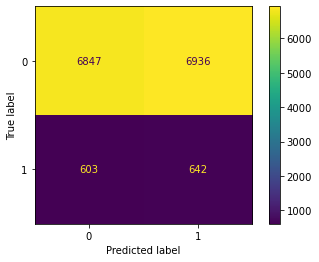

In [29]:
plot_confusion_matrix(svclassifier, testX, testY)
plt.show()

# LDA

In [37]:
clf = LinearDiscriminantAnalysis(solver='lsqr')
clf.fit(trainX, trainY)
y_predict = clf.predict(testX)
print(classification_report(testY, y_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13783
           1       0.00      0.00      0.00      1245

    accuracy                           0.92     15028
   macro avg       0.46      0.50      0.48     15028
weighted avg       0.84      0.92      0.88     15028



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


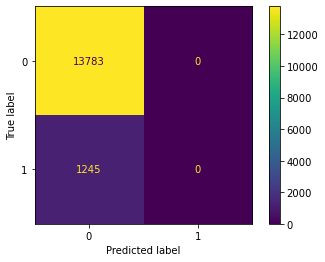

In [38]:
plot_confusion_matrix(clf, testX, testY)
plt.show()

# LSTM

In [39]:
print(data)

[[13.1         1.          0.         ... 31.78850762  1.035
  32.03657873]
 [13.1         1.          0.         ... 31.78850762  1.035
  32.03657873]
 [ 8.65        1.          0.         ... 41.6309968   1.035
  30.8861654 ]
 ...
 [ 5.05        1.         20.41890082 ... 42.6263996  -0.8597137
  65.65111348]
 [13.25        1.         20.4276744  ... 42.47853643 -0.8597137
  66.15998955]
 [ 9.55        1.         20.12337994 ... 45.17626419 -1.51863758
  79.76500473]]


In [46]:
data.shape

(60111, 15)

In [106]:
data1 = data.reshape((-1, 1, 15))

In [107]:
data1

array([[[13.1       ,  1.        ,  0.        , ..., 31.78850762,
          1.035     , 32.03657873]],

       [[13.1       ,  1.        ,  0.        , ..., 31.78850762,
          1.035     , 32.03657873]],

       [[ 8.65      ,  1.        ,  0.        , ..., 41.6309968 ,
          1.035     , 30.8861654 ]],

       ...,

       [[ 5.05      ,  1.        , 20.41890082, ..., 42.6263996 ,
         -0.8597137 , 65.65111348]],

       [[13.25      ,  1.        , 20.4276744 , ..., 42.47853643,
         -0.8597137 , 66.15998955]],

       [[ 9.55      ,  1.        , 20.12337994, ..., 45.17626419,
         -1.51863758, 79.76500473]]])

In [108]:
data1.shape

(60111, 1, 15)

In [109]:
data1 = np.asarray(data1).astype('float64')
labels1 = np.array(labels, dtype='float64')

In [110]:
(trainX, testX, trainY, testY) = train_test_split(data1, labels1, test_size=0.25, stratify=labels, shuffle=True)

In [68]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, 15)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.fit(trainX, trainY, epochs=30, batch_size=8, verbose=2, validation_data=(testX, testY))

Epoch 1/30
5636/5636 - 17s - loss: 0.0861 - accuracy: 0.9152 - val_loss: 0.0765 - val_accuracy: 0.9172
Epoch 2/30
5636/5636 - 12s - loss: 0.0762 - accuracy: 0.9172 - val_loss: 0.0760 - val_accuracy: 0.9172
Epoch 3/30
5636/5636 - 11s - loss: 0.0762 - accuracy: 0.9172 - val_loss: 0.0761 - val_accuracy: 0.9172
Epoch 4/30
5636/5636 - 14s - loss: 0.0762 - accuracy: 0.9172 - val_loss: 0.0762 - val_accuracy: 0.9172
Epoch 5/30
5636/5636 - 12s - loss: 0.0761 - accuracy: 0.9172 - val_loss: 0.0760 - val_accuracy: 0.9172
Epoch 6/30
5636/5636 - 13s - loss: 0.0762 - accuracy: 0.9172 - val_loss: 0.0760 - val_accuracy: 0.9172
Epoch 7/30
5636/5636 - 18s - loss: 0.0762 - accuracy: 0.9172 - val_loss: 0.0762 - val_accuracy: 0.9172
Epoch 8/30
5636/5636 - 19s - loss: 0.0762 - accuracy: 0.9172 - val_loss: 0.0766 - val_accuracy: 0.9172
Epoch 9/30
5636/5636 - 11s - loss: 0.0761 - accuracy: 0.9172 - val_loss: 0.0760 - val_accuracy: 0.9172
Epoch 10/30
5636/5636 - 14s - loss: 0.0761 - accuracy: 0.9172 - val_loss:

In [84]:
loss, accuracy = model.evaluate(testX, testY)
print("Loss:" + str(loss))
print("Accuracy:" + str(accuracy))

470/470 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9172
Loss:0.07630766183137894
Accuracy:0.9171546697616577


# DT

In [90]:
data = np.array(x_train, dtype='float64')

In [91]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, stratify=labels, shuffle=True)

In [92]:
dt = DecisionTreeClassifier()
dt.fit(trainX, trainY)
y_predict1 = dt.predict(testX)
print(accuracy_score(testY, y_predict1))
print(classification_report(testY, y_predict1))

0.9942108064945435
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13783
           1       0.97      0.96      0.97      1245

    accuracy                           0.99     15028
   macro avg       0.98      0.98      0.98     15028
weighted avg       0.99      0.99      0.99     15028



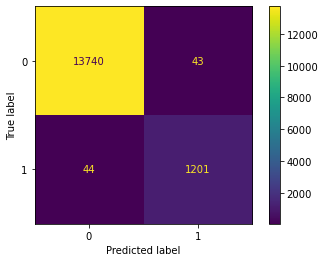

In [93]:
plot_confusion_matrix(dt, testX, testY)
plt.show()

# RF

In [98]:
rf = RandomForestClassifier()
rf.fit(trainX, trainY)
y_predict1 = rf.predict(testX)
print(accuracy_score(testY, y_predict1))
print(classification_report(testY, y_predict1))

0.9949427734894863
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13783
           1       0.98      0.96      0.97      1245

    accuracy                           0.99     15028
   macro avg       0.99      0.98      0.98     15028
weighted avg       0.99      0.99      0.99     15028



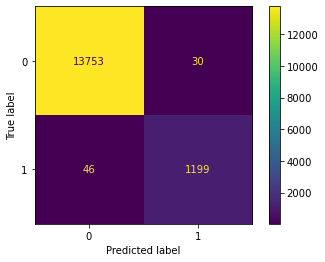

In [99]:
plot_confusion_matrix(rf, testX, testY)
plt.show()

# NB

In [100]:
nb = GaussianNB()
nb.fit(trainX, trainY)
y_predict1 = nb.predict(testX)
print(accuracy_score(testY, y_predict1))
print(classification_report(testY, y_predict1))

0.8971253659834975
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13783
           1       0.18      0.07      0.10      1245

    accuracy                           0.90     15028
   macro avg       0.55      0.52      0.52     15028
weighted avg       0.86      0.90      0.88     15028



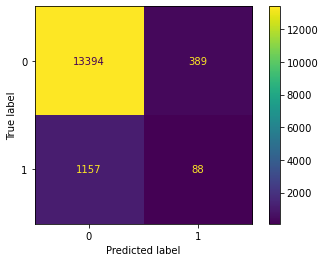

In [102]:
plot_confusion_matrix(nb, testX, testY)
plt.show()